# Fake Job Posting Detection

In [2]:
import pandas as pd
import numpy as np

my_data = pd.read_csv('fake_job_postings.csv')

In [3]:
missing_count = 0

# Loop through each column
for col in my_data.columns:
    # Count missing values in the column
    col_missing = my_data[col].isnull().sum()
    # Add to counter variable
    missing_count += col_missing

# Print total missing values
print("Total missing values:", missing_count)

df = my_data.dropna()

# Find duplicate values
print(df.duplicated().sum())

# Drop duplicate values
df = df.drop_duplicates()

Total missing values: 70103
0


In [4]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,774.000000,774.000000,774.000000,774.000000,774.000000
mean,8664.093023,0.094315,0.978036,0.673127,0.093023
std,5014.106692,0.292456,0.146660,0.469374,0.290653
min,7.000000,0.000000,0.000000,0.000000,0.000000
25%,4483.500000,0.000000,1.000000,0.000000,0.000000
50%,8542.000000,0.000000,1.000000,1.000000,0.000000
75%,12922.250000,0.000000,1.000000,1.000000,0.000000
max,17866.000000,1.000000,1.000000,1.000000,1.000000


# Exploratory Data Analysis (EDA):

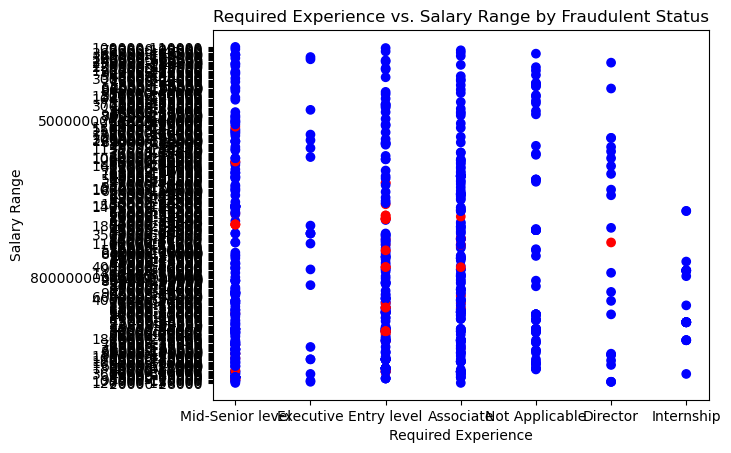

In [5]:
import matplotlib.pyplot as plt

# Scatter plot of required experience vs. salary range by fraudulent status
colors = {0:"blue", 1:"red"}
plt.scatter(df["required_experience"], df["salary_range"], c=df["fraudulent"].apply(lambda x: colors[x]))
plt.xlabel("Required Experience")
plt.ylabel("Salary Range")
plt.title("Required Experience vs. Salary Range by Fraudulent Status")
plt.show()

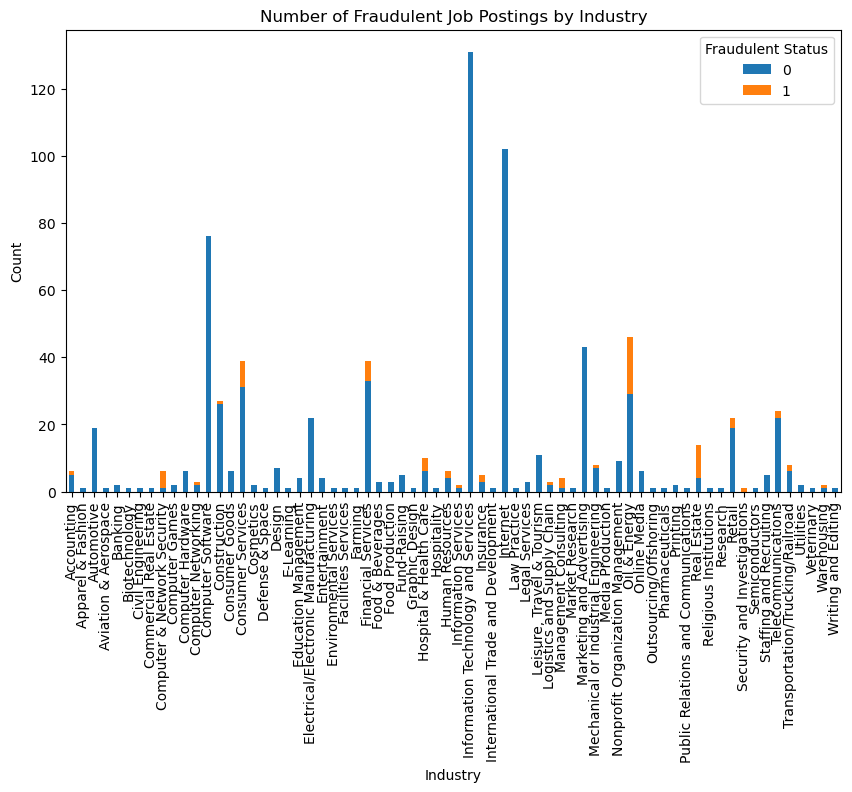

In [6]:
# Group by industry and fraudulent status
fraud_counts = df.groupby(["industry", "fraudulent"]).size().unstack()

# Plot bar chart
fraud_counts.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Number of Fraudulent Job Postings by Industry")
plt.xlabel("Industry")
plt.ylabel("Count")
plt.legend(title="Fraudulent Status")
plt.show()

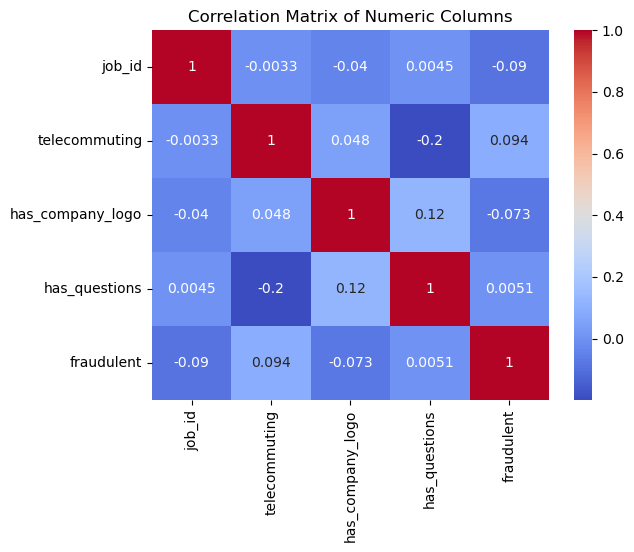

In [7]:
import seaborn as sns

# Select numeric columns
num_cols = df.select_dtypes(include=[np.number]).columns

# Create correlation matrix
corr_matrix = df[num_cols].corr()

# Plot heatmap
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix of Numeric Columns")
plt.show()

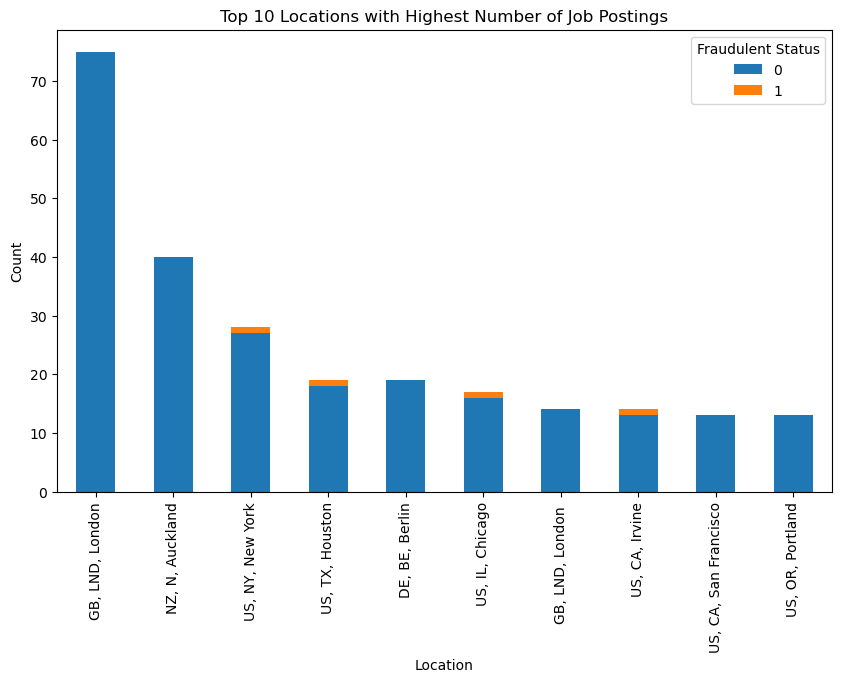

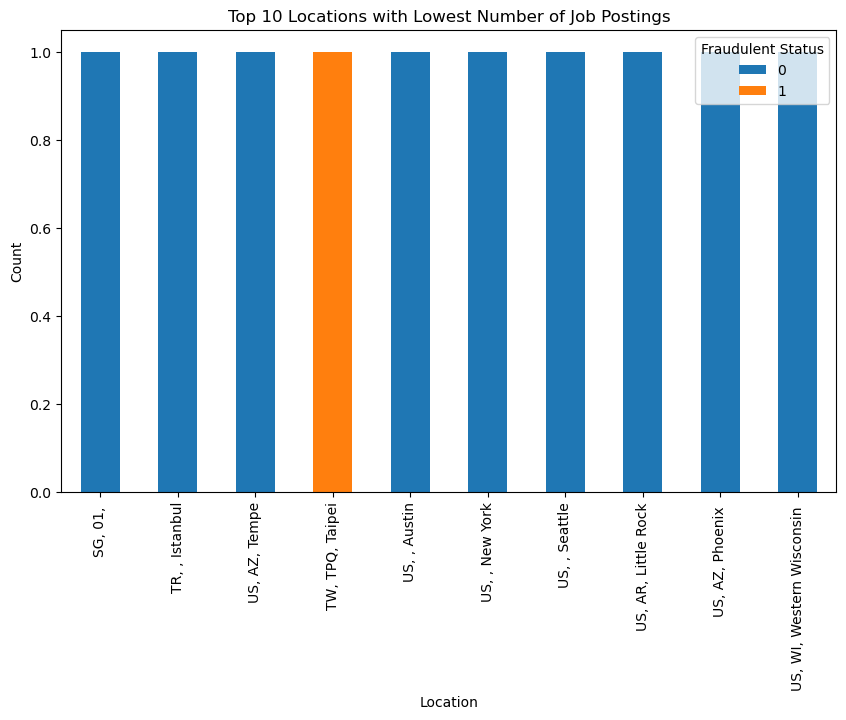

In [8]:
# Get counts by location and fraudulent status
location_counts = df.groupby(["location", "fraudulent"]).size().unstack().fillna(0)

# Sort by total counts
location_counts["total"] = location_counts.sum(axis=1)
location_counts = location_counts.sort_values(by="total", ascending=False)
location_counts = location_counts.drop("total", axis=1)

# Get top and bottom 10 locations by count
top_locations = location_counts.head(10)
bottom_locations = location_counts.tail(10)

# Plot bar charts for top locations
top_locations.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Top 10 Locations with Highest Number of Job Postings")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Fraudulent Status")
plt.show()

# Plot bar charts for bottom locations
bottom_locations.plot(kind="bar", stacked=True, figsize=(10, 6))
plt.title("Top 10 Locations with Lowest Number of Job Postings")
plt.xlabel("Location")
plt.ylabel("Count")
plt.legend(title="Fraudulent Status")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


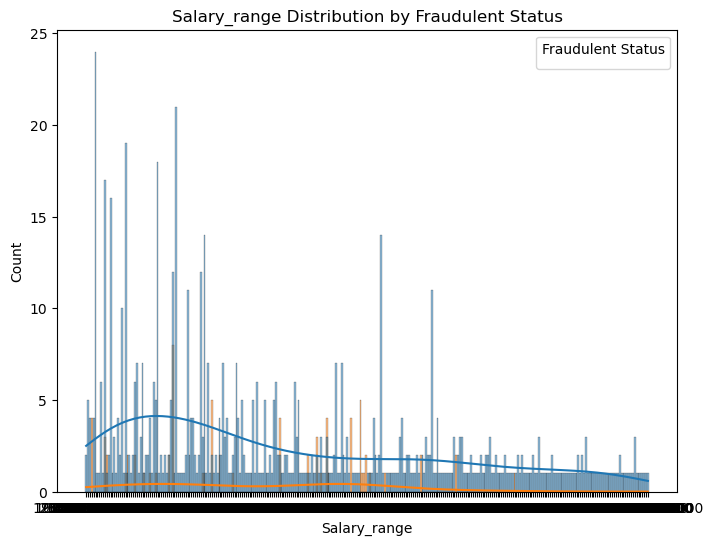

In [9]:
# Select numeric columns
num_cols = ["salary_range"]

# Plot histograms
for col in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=col, hue="fraudulent", kde=True)
    plt.title(f"{col.capitalize()} Distribution by Fraudulent Status")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.legend(title="Fraudulent Status")
    plt.show()

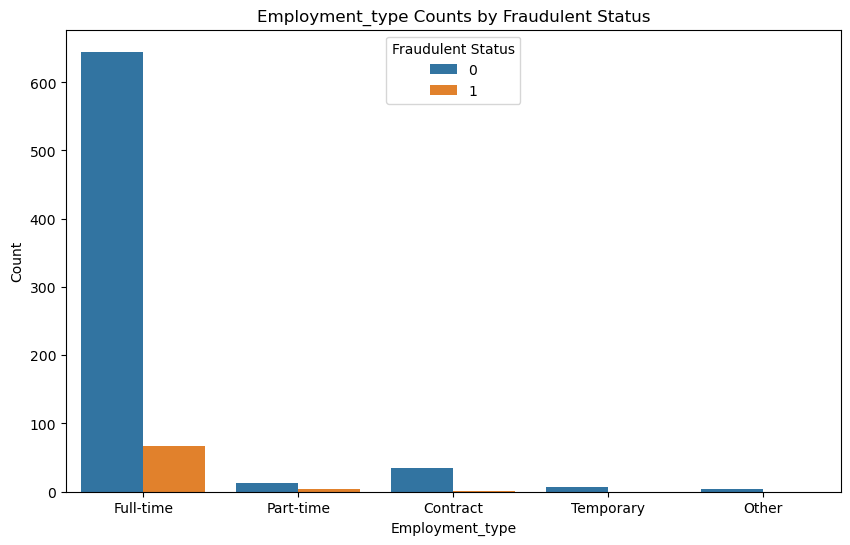

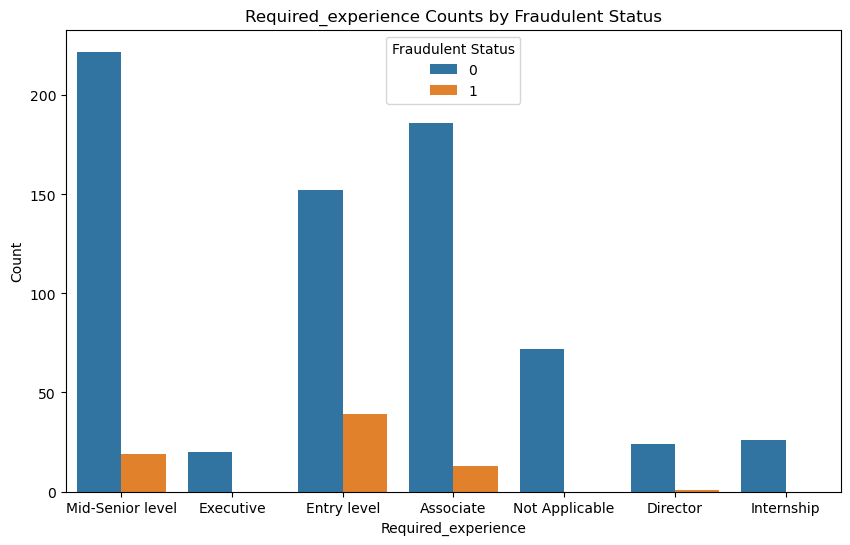

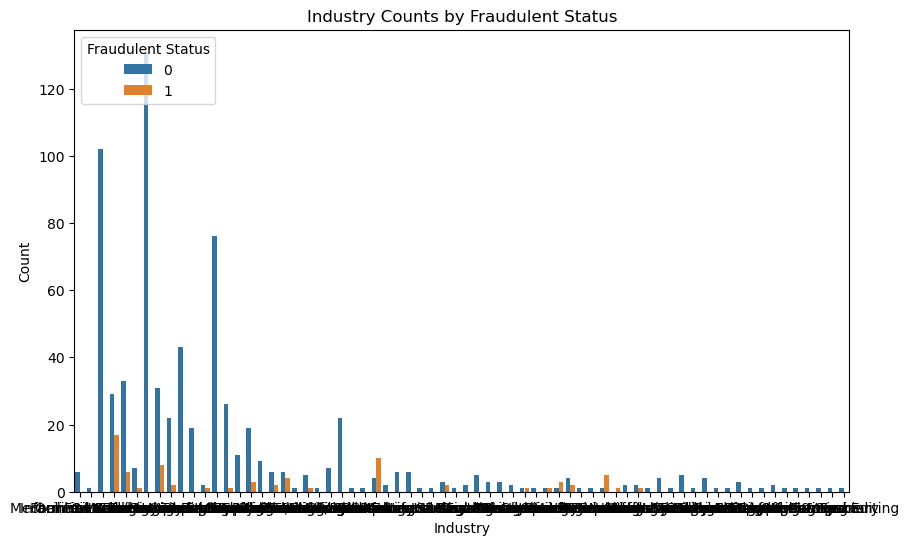

In [10]:
# Select categorical columns
cat_cols = ["employment_type", "required_experience", "industry"]

# Plot bar charts
for col in cat_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=col, hue="fraudulent")
    plt.title(f"{col.capitalize()} Counts by Fraudulent Status")
    plt.xlabel(col.capitalize())
    plt.ylabel("Count")
    plt.legend(title="Fraudulent Status")
    plt.show()

# SGD Classifier:

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

# Data preprocessing
df = df.dropna()

# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Feature selection
X = df.drop(["fraudulent"], axis=1)
y = df["fraudulent"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# make predictions on the testing data
sgd_clf = SGDClassifier(random_state=42)

# train the model on the training data
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

# calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9161290322580645


# Logistic Regression Model:

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

# Data preprocessing
df = df.dropna()

# Feature selection
X = df.drop(["fraudulent"], axis=1)
y = df["fraudulent"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression object
lr = LogisticRegression(random_state=42, max_iter=1000) # increasing the max number of iterations for successful convergence of the model

# Fit the model using the training data
lr.fit(X_train, y_train)

# Predict the labels of the test set
y_pred = lr.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9935483870967742
